**Final Project** - Ivy O'Neal-Odom

**Question** - Given an optimistic look at the future of humanity, how long until we fully colonize the Milky Way?

Nikolai Kardashev put forward the Kardashev scale in 1964. It measures an upper bound (calculated using exploited power) of the functional capacity of a civilization. A Kardashev Type One (K-1) civlization will be exploiting an amount of power equivalent to the power generated by its parent star which falls on its home planet, K-2 civilization will be exploiting all the power generated by its parent star, and a K-3 civilization will be exploiting all the power generated by all the stars in its home galaxy.

A K-1 civilization will be exploiting around 10^16 W, a K-2 civilization ~10^26, and a K-3 ~10^36. Carl Sagan looked at this relationship and interpolated the scale using the following equation:

    K = (log10(P) - 6) / 10

where P is the power exploited by a civilization in Watts and K is the K-Type of that civilization.

**Methodology** - Using data on human population as well as the power produced/consumed by each person across history, I calculated the following formula to predict the power capacity of humanity given the year (where positive numbers are years C.E. and negative numbers are years B.C.E.):

    P=1679092304013.12*(e^(0.00106630695041*year))

This curve fits the data with an R-squared value of ~0.993 which, due to the scale I am working with, is not suitable for immediate predictions (for example it predicts that humanity is, in the year 2000, a K-0.72 civlization while we were, in fact, only K-0.71), but it will suffice for the galactic time scale of this model.

In [1]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
import math

In [2]:
def make_system(c, e):
    """Make a system object for the model.
    
    c: the coefficient of the model
    e: the coefficeint of the exponent of the model
    
    returns: System object
    """
    init = State(K = 0.622)    #The K-type of humanity during the year 0 C.E.
    t0 = 0
    t_end = 6e4

    return System(init=init, t0=t0, t_end=t_end,
                  c=c, e=e)

In [3]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeSeries
    """
    init, t0, t_end = system.init, system.t0, system.t_end
    
    frame = TimeSeries()
    frame[t0] = init
    
    t = t0
    time_step = 100
    old_percent_done = -1
    
    while t <= t_end:
        #This is a very slow step process. I tried to speed it up by only making a calculation
        #every 100 years, but python's TimeSeries object keeps thwarting me
        percent_done = round((t/t_end) * 100, 2)
        if percent_done % 1 < 0.05 and old_percent_done != percent_done:
            old_percent_done = percent_done
            print(str(percent_done) + "% of Simulation Completed (" + str(t) + "/" + str(t_end) + ")")
            
        
        new_row = update_func(frame[t], t, system)
        
        #Python's frame etc. require this weird way of storing
        #the year with a timestep other than 1
        for i in range(t + 1, t + time_step):
            t = i
            frame[t] = new_row
    
    return frame

In [4]:
def simple_update_func(state, t, system):
    """
    
    This update function does not take into account catatsrophe.
    As a result, it is equivalent to plotting power vs time and
    plugging in the desired K-type. However, it will provide
    the basis for the more complex function.
    
    state: State (p)
    system: System object
    
    returns: State (p)
    """
    c, e = system.c, system.e
    k = state

    p = 10**(k * 10) + 6 #Turn the K-Type into current Power
    
    p = c*exp(e*t)   #Update current Power
    
    k = (math.log10(p)-6)/10    #Convert Power back to K-Type
    
    return State(K=k)

In [5]:
def complex_update_func(state, t, system):
    """
    
    This update function takes into account the non-zero
    likelihood and increasing severity of catastrophes.
    
    Unfortunately (for reasons described in detail later),
    I was unable to use this function. I've left it in here
    as a demonstration that, if I had sufficient data,
    I would be able to find a relationship between Power
    and catastrophe_severity and then I could predict the
    impact of catastrophes.
    
    state: State (k)
    system: System object
    
    returns: State (k)
    """
    c, e, catastrophe_likelihood = system.c, system.e, system.catastrophe_likelihood
    k, catastrophe_severity = state

    p = 10**(k * 10) + 6 #Turn the K-Type into current Power
    
    p = c*exp(e*t)   #Update current Power 
    
    #Using catastrophe_likelihood guess if a catastrophe happens this year
        #If one does happen, decrease power by catastrophe_severity
    
    #As we become more powerful, our ability to destroy ourselves increases:
    #Change catastrophe_severity to keep up with Power
    
    k = (math.log10(p)-6)/10    #Convert Power back to K-Type
    
    return State(K=k)

Beginning Simple Simulation
0.0% of Simulation Completed (0/60000.0)
12.04% of Simulation Completed (7227/60000.0)
13.04% of Simulation Completed (7821/60000.0)
14.03% of Simulation Completed (8415/60000.0)
15.02% of Simulation Completed (9009/60000.0)
16.0% of Simulation Completed (9603/60000.0)
29.04% of Simulation Completed (17424/60000.0)
30.03% of Simulation Completed (18018/60000.0)
31.02% of Simulation Completed (18612/60000.0)
32.01% of Simulation Completed (19206/60000.0)
33.0% of Simulation Completed (19800/60000.0)
45.04% of Simulation Completed (27027/60000.0)
46.04% of Simulation Completed (27621/60000.0)
47.02% of Simulation Completed (28215/60000.0)
48.02% of Simulation Completed (28809/60000.0)
49.0% of Simulation Completed (29403/60000.0)
50.0% of Simulation Completed (29997/60000.0)
61.05% of Simulation Completed (36630/60000.0)
62.04% of Simulation Completed (37224/60000.0)
63.03% of Simulation Completed (37818/60000.0)
64.02% of Simulation Completed (38412/60000.0)


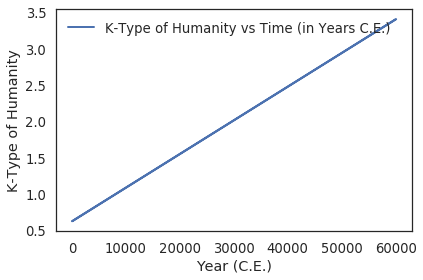

In [6]:
coef = 1679092304013.12
exp_coef = 0.00106630695041


#--------------------------------------------Simple Model--------------------------------------------------
'''
As I mentioned in the simple_update_func function,
this is a very slow process. I included a progress
percent counter in this model for this reason. On
my computer the whole simulation and calculation
took around 3 minutes. I apologize for this terrible
run time. I spent a lot of time trying to decrease
the number of calculations used, but python seemed
set on preventing that.
'''
system = make_system(coef, exp_coef)
print("Beginning Simple Simulation")
simple_results = run_simulation(system, simple_update_func)
print("Done Running Simple Simulation")

#Now find when, if ever, we become K-3
k3_simple = -1
year = system.t0

print("Calculating the year we become a K-3 species, if we ever do")
old_percent_done = -1

while year <= system.t_end:
    percent_done = round((year/system.t_end) * 100, 0)
    if percent_done % 10 < 0.05 and old_percent_done != percent_done:
        old_percent_done = percent_done
        print(str(percent_done) + "% of Checking Completed (" + str(year) + "/" + str(system.t_end) + ")")
        
    if (simple_results[year] >= 3).bool():
        k3_simple = year
        print("\n\n\n\nAccording to the simple model, humanity will become a K-3 Civilization in the year " + str(k3_simple))
        year = system.t_end + 2
    year = year + 1
if k3_simple == -1:
    print("\n\n\n\nAccording to the simple model, humanity will not become a K-3 Civilization in 60,000 years.")
    print("At the end of this model (60,000 years), humanity will be a K-" + str(k3_simple) + " civilization.")


#-----------------------------------------Display the Graph------------------------------------------------
label = 'K-Type of Humanity vs Time (in Years C.E.)'
plot(simple_results, label=label)

decorate(xlabel='Year (C.E.)',
         ylabel='K-Type of Humanity')

**Results** - According to this model, humanity will be a K-3 civilization in ~52,000 years. It also predicts that we will be a K-1 species in ~8,000 years and a K-2 in ~ 20,000-30,000 years. 

**Interpretation** - We are currently a K-0.73 civilization. The reign of Augustus Caesar took place while we were a K-0.62 civilization. The scale of this model is extreme and lots of precision is lost. This prediction also a lot of assumptions (as discussed below). However, it still paints an optimistic and viable picture of the future of our species. This project is, certainly, highly speculative, but I think that finding these values and looking so far into humanity's future is significant.

**Shortcomings** - The largest shortcoming of this project is my failure to incorporate catastrophe calculations into the model. I left in the complex_update_func function which would, in theory handle this interesting problem. However, I was unable to use any of the required data. Humanity is the only example we have of a civilization-building species, and we haven't (yet) experienced any species annihilating events. As a result, it is impossible to put numbers to the likelihood or severity of a cataclysm. One of the central complications relating to the Fermi Paradox (which was the reason behind the Kardashev scale in the first place) is the fact that, as previously mentioned, we have a sample size of one. I was hoping that I could use data from the Spanish Flu and the Doomsday Clock to come up with rough estimates to use, but these didn't end up working in the way I wanted. Fortunately, this leaves the model with a highly optimistic outlook on humanity.

Most of the other shortcomings of the model (in my opinion) come from the flawed data. One of my big assumptions was that, during the period of near stagnation before agriculture, the power produced by a human would exactly (or nearly exactly) equal the power used by them. This makes sense to me. After all, an excess of power would seem to have to result in an increase in population. However, I could not find any science to back this up.

**Bibliography**

Nikolai Kardashev 1964, "Transmission of Information by Extraterrestrial Civilizations"

Carl Sagan, 1973 “Cosmic Connection: An Extraterrestrial Perspective”

livestrong.com (for human calorie consumption data)

US Census Bureau (for human population data)

Global Energy Statistical Yearbook